In [25]:
import pandas as pd
#import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from wordcloud import WordCloud, STOPWORDS


In [26]:
df = pd.read_json('datasets/df_limpio.json', lines=True)

In [27]:
df

,publisher,genres,app_name,title,url,release_date,tags,discount_price,reviews_url,specs,price,early_access,id,developer,sentiment,metascore,anio_lanzamiento
0,Kotoshiro,"[Action, Casual, Indie, Simulation, Strategy]",Lost Summoner Kitty,Lost Summoner Kitty,http://store.steampowered.com/app/761140/Lost_...,2018-01-04,"[Strategy, Action, Indie, Casual, Simulation]",4.49,http://steamcommunity.com/app/761140/reviews/?...,[Single-player],4.99,False,761140.0,Kotoshiro,,,2018
1,"Making Fun, Inc.","[Free to Play, Indie, RPG, Strategy]",Ironbound,Ironbound,http://store.steampowered.com/app/643980/Ironb...,2018-01-04,"[Free to Play, Strategy, Indie, RPG, Card Game...",NaN,http://steamcommunity.com/app/643980/reviews/?...,"[Single-player, Multi-player, Online Multi-Pla...",Free To Play,False,643980.0,Secret Level SRL,Mostly Positive,,2018
2,Poolians.com,"[Casual, Free to Play, Indie, Simulation, Sports]",Real Pool 3D - Poolians,Real Pool 3D - Poolians,http://store.steampowered.com/app/670290/Real_...,2017-07-24,"[Free to Play, Simulation, Sports, Casual, Ind...",NaN,http://steamcommunity.com/app/670290/reviews/?...,"[Single-player, Multi-player, Online Multi-Pla...",Free to Play,False,670290.0,Poolians.com,Mostly Positive,,2017
3,彼岸领域,"[Action, Adventure, Casual]",弹炸人2222,弹炸人2222,http://store.steampowered.com/app/767400/2222/,2017-12-07,"[Action, Adventure, Casual]",0.83,http://steamcommunity.com/app/767400/reviews/?...,[Single-player],0.99,False,767400.0,彼岸领域,,,2017
4,None,,Log Challenge,None,http://store.steampowered.com/app/773570/Log_C...,,"[Action, Indie, Casual, Sports]",1.79,http://steamcommunity.com/app/773570/reviews/?...,"[Single-player, Full controller support, HTC V...",2.99,False,773570.0,None,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32130,Ghost_RUS Games,"[Casual, Indie, Simulation, Strategy]",Colony On Mars,Colony On Mars,http://store.steampowered.com/app/773640/Colon...,2018-01-04,"[Strategy, Indie, Casual, Simulation]",1.49,http://steamcommunity.com/app/773640/reviews/?...,"[Single-player, Steam Achievements]",1.99,False,773640.0,"Nikita ""Ghost_RUS""",,,2018
32131,Sacada,"[Casual, Indie, Strategy]",LOGistICAL: South Africa,LOGistICAL: South Africa,http://store.steampowered.com/app/733530/LOGis...,2018-01-04,"[Strategy, Indie, Casual]",4.24,http://steamcommunity.com/app/733530/reviews/?...,"[Single-player, Steam Achievements, Steam Clou...",4.99,False,733530.0,Sacada,,,2018
32132,Laush Studio,"[Indie, Racing, Simulation]",Russian Roads,Russian Roads,http://store.steampowered.com/app/610660/Russi...,2018-01-04,"[Indie, Simulation, Racing]",1.39,http://steamcommunity.com/app/610660/reviews/?...,"[Single-player, Steam Achievements, Steam Trad...",1.99,False,610660.0,Laush Dmitriy Sergeevich,,,2018
32133,SIXNAILS,"[Casual, Indie]",EXIT 2 - Directions,EXIT 2 - Directions,http://store.steampowered.com/app/658870/EXIT_...,2017-09-02,"[Indie, Casual, Puzzle, Singleplayer, Atmosphe...",NaN,http://steamcommunity.com/app/658870/reviews/?...,"[Single-player, Steam Achievements, Steam Cloud]",4.99,False,658870.0,"xropi,stev3ns",1 user reviews,,2017


Se cuentan el numeero de filas y columnas para saber el volumen de datos que estamos manejando.

In [28]:
filas, columnas = df.shape
print(f'Existen {filas} filas y {columnas} columnas')

Existen 32135 filas y 17 columnas


Describimos todo el dataset para darnos un vistazo general de los datos del mismo.

In [29]:
df.describe(include='all')

,publisher,genres,app_name,title,url,release_date,tags,discount_price,reviews_url,specs,price,early_access,id,developer,sentiment,metascore,anio_lanzamiento
count,24083,32135,32133,30085,32135,32135,31972,225.000000,32133,32135,32135.00,32135,3.213300e+04,28836,32135,32135,32135
unique,8239,884,32094,30054,32135,3583,15395,NaN,32132,4650,163.00,2,NaN,10992,19,71,44
top,Ubisoft,,Soundtrack,Soundtrack,http://store.steampowered.com/app/761140/Lost_...,,"[Casual, Simulation]",NaN,http://steamcommunity.com/app/612880/reviews/?...,[Single-player],4.99,False,NaN,Ubisoft - San Francisco,,,2017
freq,385,3283,3,3,1,2067,1292,NaN,2,2794,4278.00,30188,NaN,1259,7182,29528,9595
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.930533,NaN,NaN,NaN,NaN,4.517574e+05,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.492643,NaN,NaN,NaN,NaN,1.827140e+05,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.490000,NaN,NaN,NaN,NaN,1.000000e+01,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.390000,NaN,NaN,NaN,NaN,3.292800e+05,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.190000,NaN,NaN,NaN,NaN,4.520600e+05,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.660000,NaN,NaN,NaN,NaN,5.934000e+05,NaN,NaN,NaN,NaN


En la siguiente grafica podemos observar los años en las que mas peliculas fueron estrenadas y donde podemos observar que en el periodo de 2017 es donde se estrenaron mas peliculas.

<Axes: xlabel='anio_lanzamiento'>

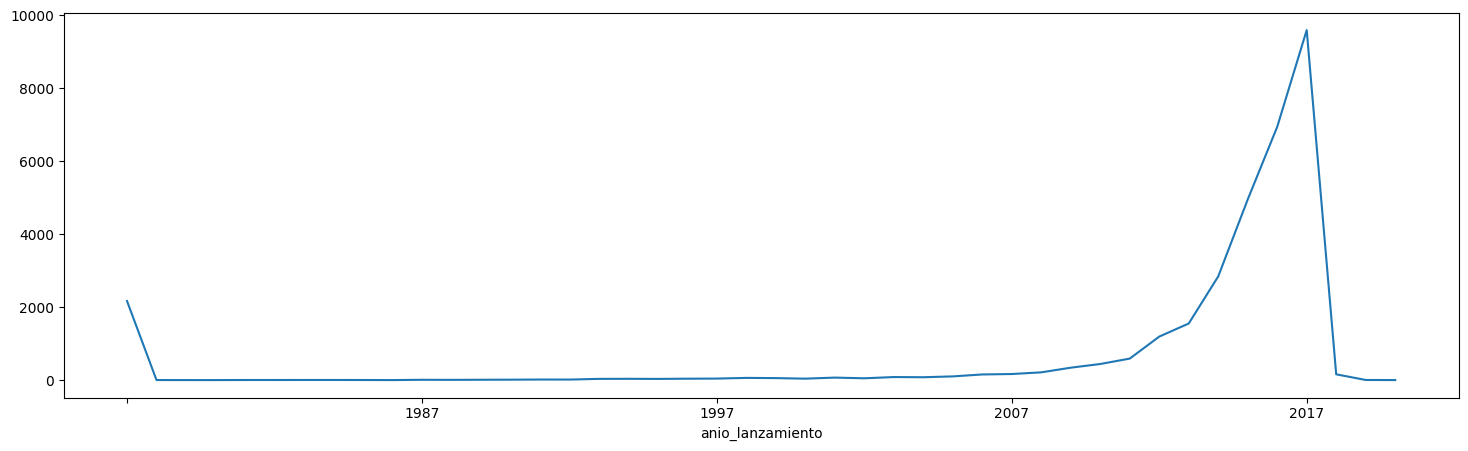

In [31]:
anios = df.groupby('anio_lanzamiento')['app_name'].count()
plt.figure(figsize=(18,5))
anios.plot()

En la siguiente grafica podemos observar la distribución de los generos en los videojuegos, nos damos cuenta que el genero predominante dentro de este dataset es Indie, mientras que el genero con menor numero de peliculas es el genero Accouting

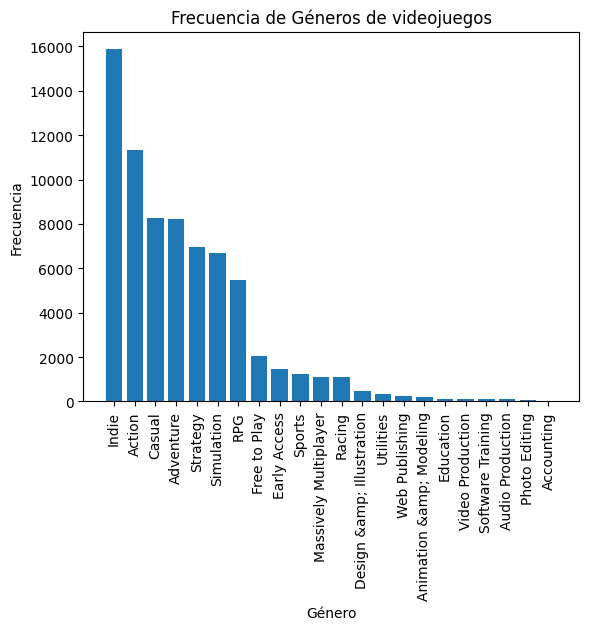

In [32]:
count_dict = {}
for genres_list in df['genres']:
    if isinstance(genres_list, list):
        for genre in genres_list:
            if genre in count_dict:
                count_dict[genre] += 1
            else:
                count_dict[genre] = 1
    elif pd.isnull(genres_list):  # Para contar los valores None
        if '' in count_dict:
            count_dict[''] += 1
        else:
            count_dict[''] = 1

# Ordenar el diccionario en orden descendente por la frecuencia de los géneros
sorted_count_dict = dict(sorted(count_dict.items(), key=lambda item: item[1], reverse=True))

# Convertir el diccionario ordenado de frecuencias en listas para graficar
genre_names = list(sorted_count_dict.keys())
genre_counts = list(sorted_count_dict.values())

# Crear la gráfica de barras
plt.bar(genre_names, genre_counts)
plt.xlabel('Género')
plt.ylabel('Frecuencia')
plt.title('Frecuencia de Géneros de videojuegos')
plt.xticks(rotation=90)
plt.show()

In [33]:
df['anio_lanzamiento'] = pd.to_datetime(df['anio_lanzamiento'])

# Extraer únicamente el año de la columna "release_date"
df['anio_lanzamiento'] = df['anio_lanzamiento'].dt.year

In [34]:
df['anio_lanzamiento'] = df['anio_lanzamiento'].replace('', None)

In [35]:
df['discount_price'] = df['discount_price'].replace('', None)
df['price'] = df['price'].replace('', None)
df['metascore'] = df['metascore'].replace('', None)

En la sieugiente figura buscamos las correlaciones y las mostramos con un heatmap.

<Axes: >

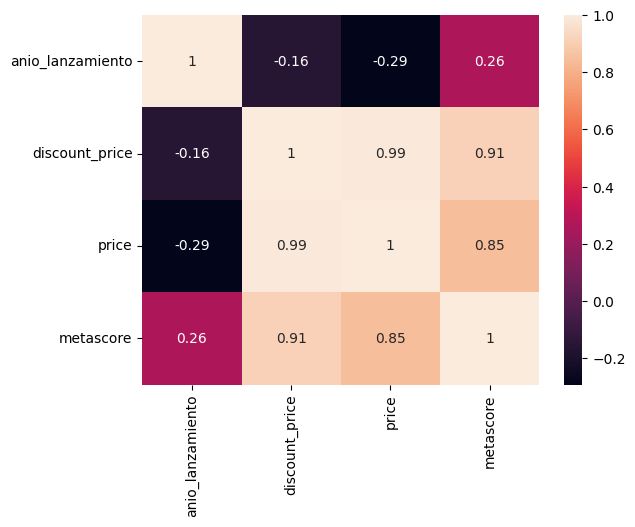

In [36]:
df_correlaciones = df[['anio_lanzamiento', 'discount_price','price', 'metascore']].dropna().corr()
sb.heatmap(df_correlaciones, annot=True)

Posteriormente buscamos outlayers en distintas columnas donde nos interesa conocer ese dato.

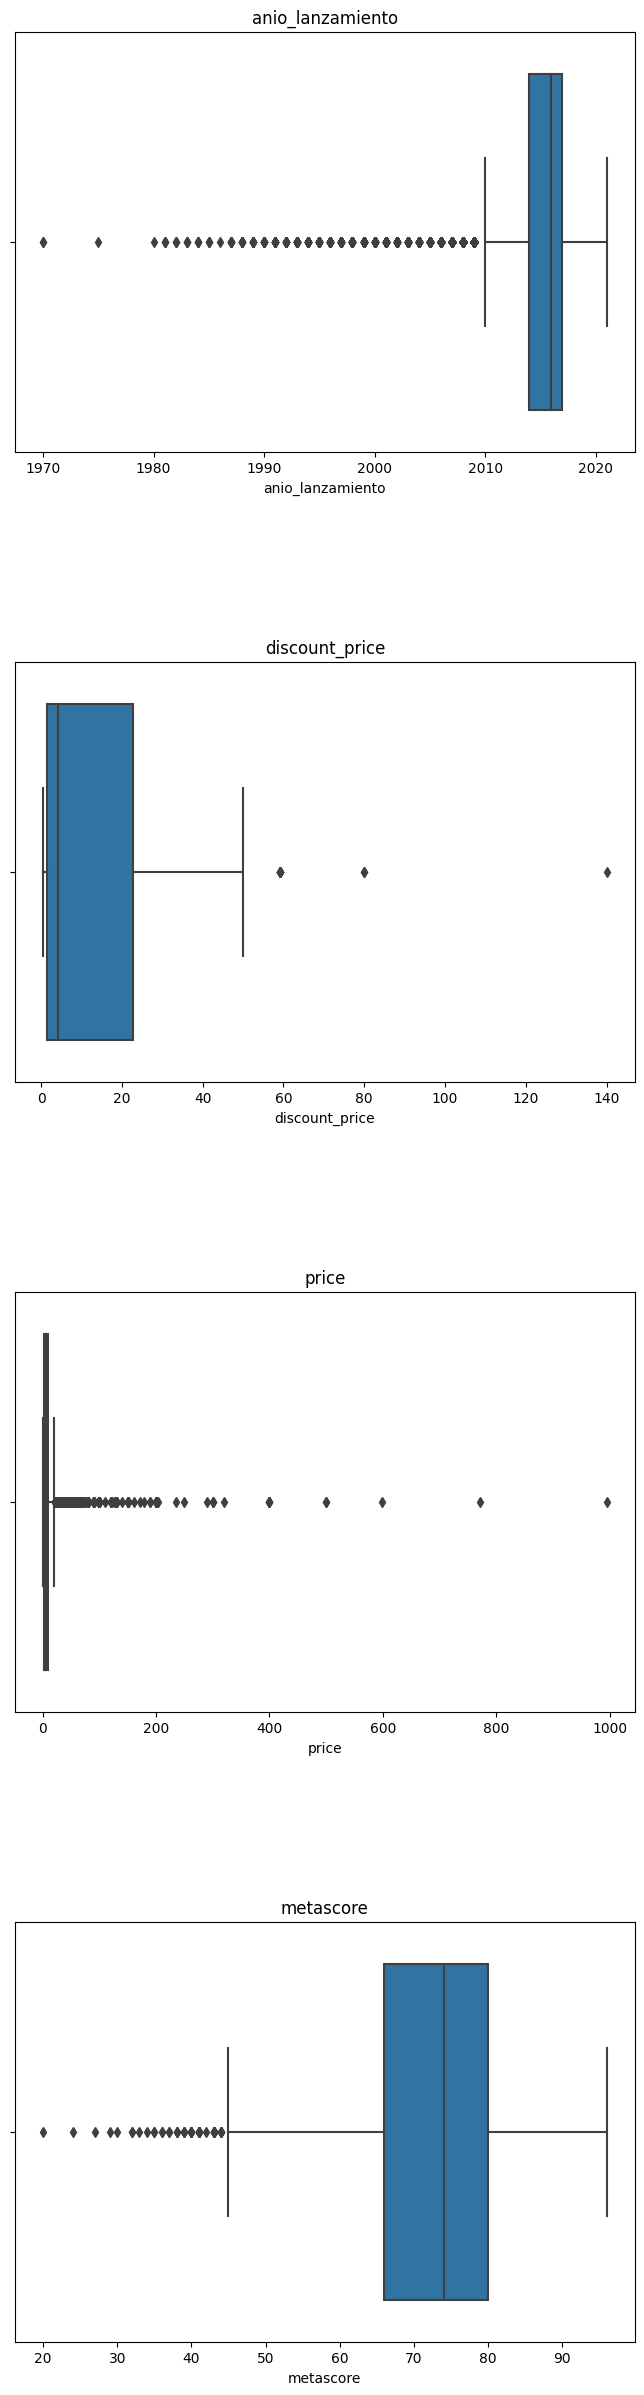

In [37]:
cols_num = ['anio_lanzamiento', 'discount_price','price', 'metascore']

fig, ax = plt.subplots(nrows=4, ncols=1, figsize = (8,30))
fig.subplots_adjust(hspace= 0.5)
for i, col in enumerate(cols_num):
    df[col] = pd.to_numeric(df[col], errors='coerce')
    sb.boxplot(x = col, data = df, ax = ax[i])
    ax[i].set_title(col)

In [38]:
df = df[['app_name']].dropna()

Posteriormente creamos una nube de palabras en base a la columna app_name para darnos cuenta que las palbras que mas se repiten en los titulos es Soundtrack, Fantasy, Pack y Ground

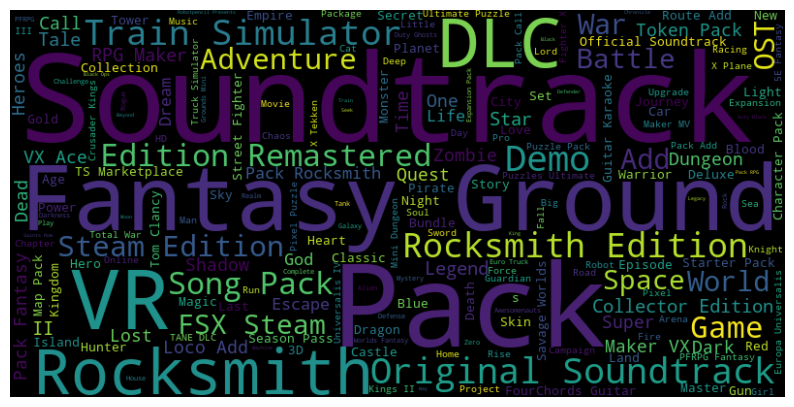

In [39]:
texto = ' '.join(df['app_name'])
wordcloud = WordCloud(width=800, height=400).generate(texto)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()